With the rise in computational social science, scientists try to use complex models like Agent-Based Models (ABM) to understand and imitate real-life conditions.

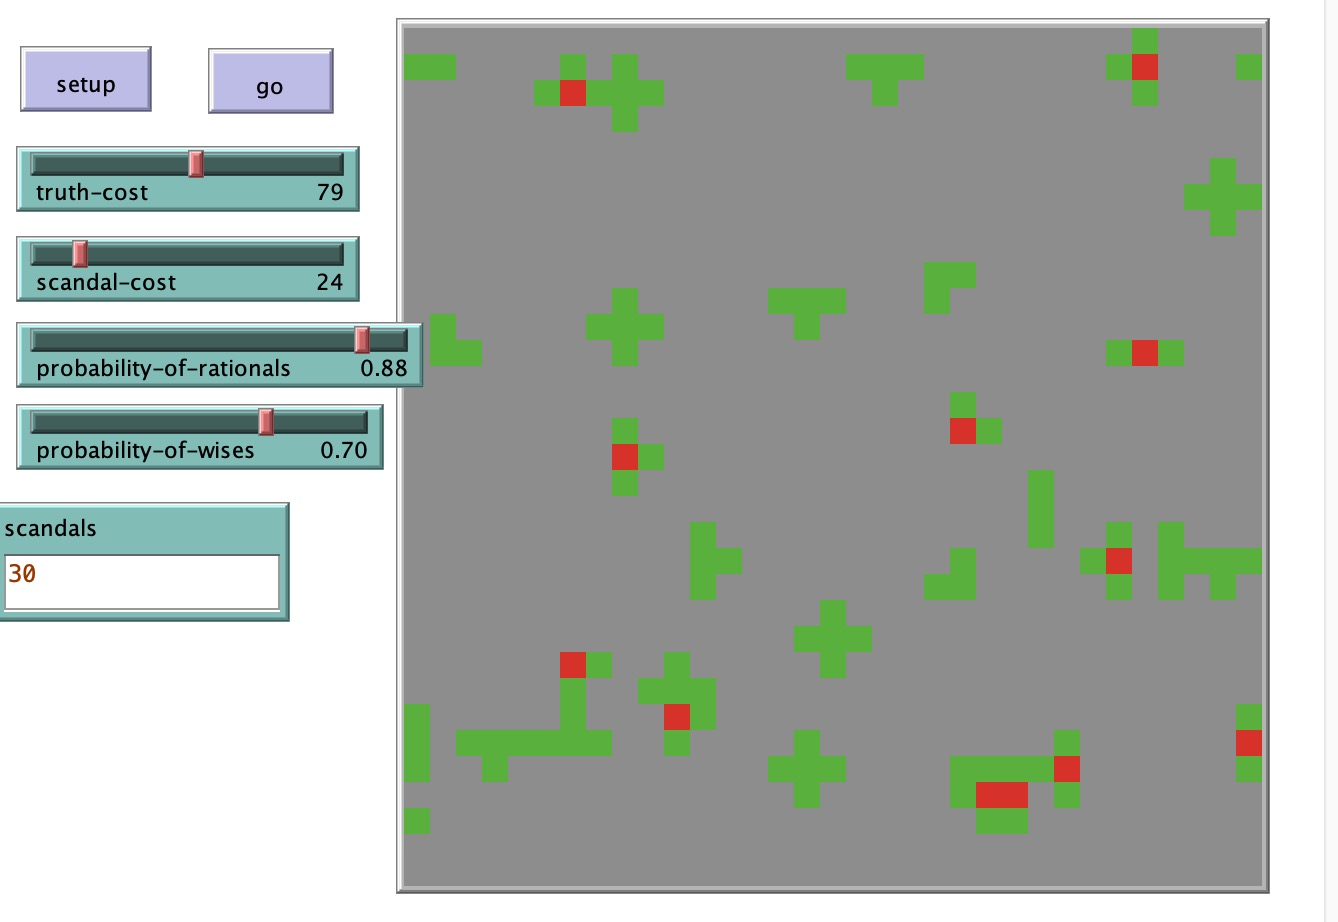

These complex models are different from simple statistical models like regression models, are using methodologies like machine learning. First, train the models using input data, and the output would be in a certain form such as a right or wrong judgment. Once the trainer learns how input predicts output, we could deploy the predictor in the real world where it’s only given inputs (that it hasn’t seen before), and ask it to predict the outputs.!

Among these, Agent-based modeling (ABM) is a real fun. It is a dynamic model to discover the emergence from individual behavior to social facts. Each actor in the model is called an agent who follows given rules and interacts with each other within clicks. The complexity of ABM is that it is hard to predict just by using the human brain and the graphing process is a real barrier. 

A software named NetLogo is released by Northwestern University to build ABMs. Can LLMs help code the ABMs?

The process will be evaluated by two abilities: 
1. Generating code using the prompt of natural language description;
2. Debug power reacting to the “error” when running the model.

Here’s my result of a model about the diffusion of fake news.

## Here is my prompt:
**Part 1, I set a template of the model I want to imitate**:
patches-own [
  kind
  life
]

**Part 2, I give detailed description of my demand to the model**:

default color of patches is grey
3 global variables: 1. probability-of-rationals 2. probability-of-wise 3. probability-of-crowds probability-of-crowds =1-probability-of-wise-probability-of-rationals

to setup
  clear-all
  create-patches 300 [
    set kind "crowd"
    set life 150
    set pcolor gray
  ]
  reset-ticks
end
generate a random patch that is red

"probability-of-wise" of the patches have kind "wise"; "probability-of-rationals" of the patches have kind "rational"

to go: patches of kind "crowd" near the one red turn red; patches of kind "wise" near the one red turn green; patches of kind "rational" near the one red remain same color.  
each patch minus life of "truth-cost" when turning green, each patch minus life of "scandal-cost" when turning red, when life< 0, patch become black and cannot change color.

ask patches to be red in the number of "scandals"（global variable）


**Here’s what I received from the GPT-4.0**.


patches-own [
  kind
  life
]

globals [
  probability-of-crowds
]

to setprob
  set probability-of-crowds 1 - probability-of-wises - probability-of-rationals
end


to setup
  clear-all
  ask patches  [
    ifelse random-float 1 < probability-of-wises [
      set kind "wise"
    ] [
      ifelse random-float 1 < probability-of-rationals [
        set kind "rational"
      ] [
        set kind "crowd"
      ]
    ]
    set life 150
    set pcolor gray
  ]
  
  ; Generate a random patch and set its color to red
  ask n-of scandals patches [
    set pcolor red
  ]
  reset-ticks
end



to go
  ask patches [
    if pcolor = red [
      ; Check neighboring patches and change color accordingly
      ask patches in-radius 1 [
        if kind = "crowd" [ 
          set pcolor red 
          set life (life - scandal-cost)
        ]
        if kind = "wise" [
          set pcolor green
          set life (life - truth-cost)
        ]
        if kind = "rational" [
          set pcolor pcolor
        ]
      ]
    ]
    
    ; Decrease life of non-red patches
    if pcolor != red [
      if life > 0 [
        set life life - 1
        if life = 0 [ set pcolor black ]
      ]
    ]
  ]
  tick
end



**There are several mistakes**: 
1. life is not checked at the beginning
2. the transformation from red to green is not conditioned in the context

So I copy-pasted the part not fitting into the chat box and described my requirement:

Then the debug ability test:
 I tried but ended up fixing it myself which is faster.


In conclusion, GPT 4.0 knows the grammar of NetLogo well and can generate an innovative model from natural language description. Though it is more efficient to prompt the word using terminologies from the software, it is not bad to translate descriptive language into coding language.
 
However, when it comes to debugging area, things are different. With the addition of a global variable in the interface of the software but not exposed in the code, it seems that GPT cannot debug anything relevant to global variables. Also, GPT 4.0 cannot find the conflict in logic with texts. Most importantly, GPT 4.0 doesn’t prefer to solve problems by recreating the coding logic but by altering the coding language, which is not helpful but rather an endless loop to debug without human double-checking.

All in all, the best using of GPT 4.0 for ABM is to generate a framework from a descriptive idea and then refine it in human logic line by line manually.
